In [2]:
import os, cv2, itertools
import numpy as np
from PIL import Image

In [3]:
image_dir = r"OM"
output_dir = r"Output"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [4]:
img = cv2.imread(r"Gra.jpg")
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [5]:
%matplotlib ipympl
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from ipyevents import Event

# Global variables
hsv_image = None
image = None

def calculate_hsv_stats(x, y, region_size=31):
    global image, hsv_image
    height, width = image.shape[:2]
    half_size = region_size // 2
    x_start = max(0, x - half_size)
    x_end = min(width, x + half_size + 1)
    y_start = max(0, y - half_size)
    y_end = min(height, y + half_size + 1)
    
    # 提取指定大小的區域
    region = hsv_image[y_start:y_end, x_start:x_end]
    
    # 分離H, S, V通道
    h, s, v = cv2.split(region)
    
    # 計算每個通道的平均值和標準差
    h_mean, h_std = np.mean(h), np.std(h)
    s_mean, s_std = np.mean(s), np.std(s)
    v_mean, v_std = np.mean(v), np.std(v)
    
    print(f"位置 ({x}, {y}) 周圍區域的HSV統計：")
    print(f"H: 平均 = {h_mean:.2f}, 標準差 = {h_std:.2f}")
    print(f"S: 平均 = {s_mean:.2f}, 標準差 = {s_std:.2f}")
    print(f"V: 平均 = {v_mean:.2f}, 標準差 = {v_std:.2f}")
    print(f"H範圍: [{max(0, h_mean - 2*h_std):.2f}, {min(180, h_mean + 2*h_std):.2f}]")
    print(f"S範圍: [{max(0, s_mean - 2*s_std):.2f}, {min(255, s_mean + 2*s_std):.2f}]")
    print(f"V範圍: [{max(0, v_mean - 2*v_std):.2f}, {min(255, v_mean + 2*v_std):.2f}]")
    print(f"upper: ({min(180, h_mean + 2*h_std)}, {min(255, s_mean + 2*s_std)}, {min(255, v_mean + 2*v_std)})")
    print(f"lower: ({max(0, h_mean - 2*h_std)}, {max(0, s_mean - 2*s_std)}, {max(0, v_mean - 2*v_std)})")
    print("--------------------")
    
    return h_mean, s_mean, v_mean, h_std, s_std, v_std

def on_click(event):
    if event['type'] == 'click':
        x, y = int(event['dataX']), int(event['dataY'])
        calculate_hsv_stats(x, y)

def load_and_process_image(image_path, region_size=31):
    global image, hsv_image
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if image is None:
        print(f"錯誤：無法從 {image_path} 載入圖像")
        return
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Convert image to RGB for display
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Create an interactive image widget
    image_widget = widgets.Image(
        value=cv2.imencode('.png', image)[1].tobytes(),
        format='png',
        width=image.shape[1],
        height=image.shape[0]
    )
    
    # Create an Event instance for the image widget
    event = Event(source=image_widget, watched_events=['click'])
    
    # Add click event to the image widget
    event.on_dom_event(on_click)
    
    display(widgets.VBox([widgets.Label("點擊圖像以分析顏色並更新檢測參數"), image_widget]))

# Usage
image_path = "tset/023Ex_000014.jpg"
load_and_process_image(image_path, region_size=21)

錯誤：無法從 tset/023Ex_000014.jpg 載入圖像


[ WARN:0@328.630] global loadsave.cpp:248 findDecoder imread_('tset/023Ex_000014.jpg'): can't open/read file: check file path/integrity


檢測到的石墨烯片數量: 0


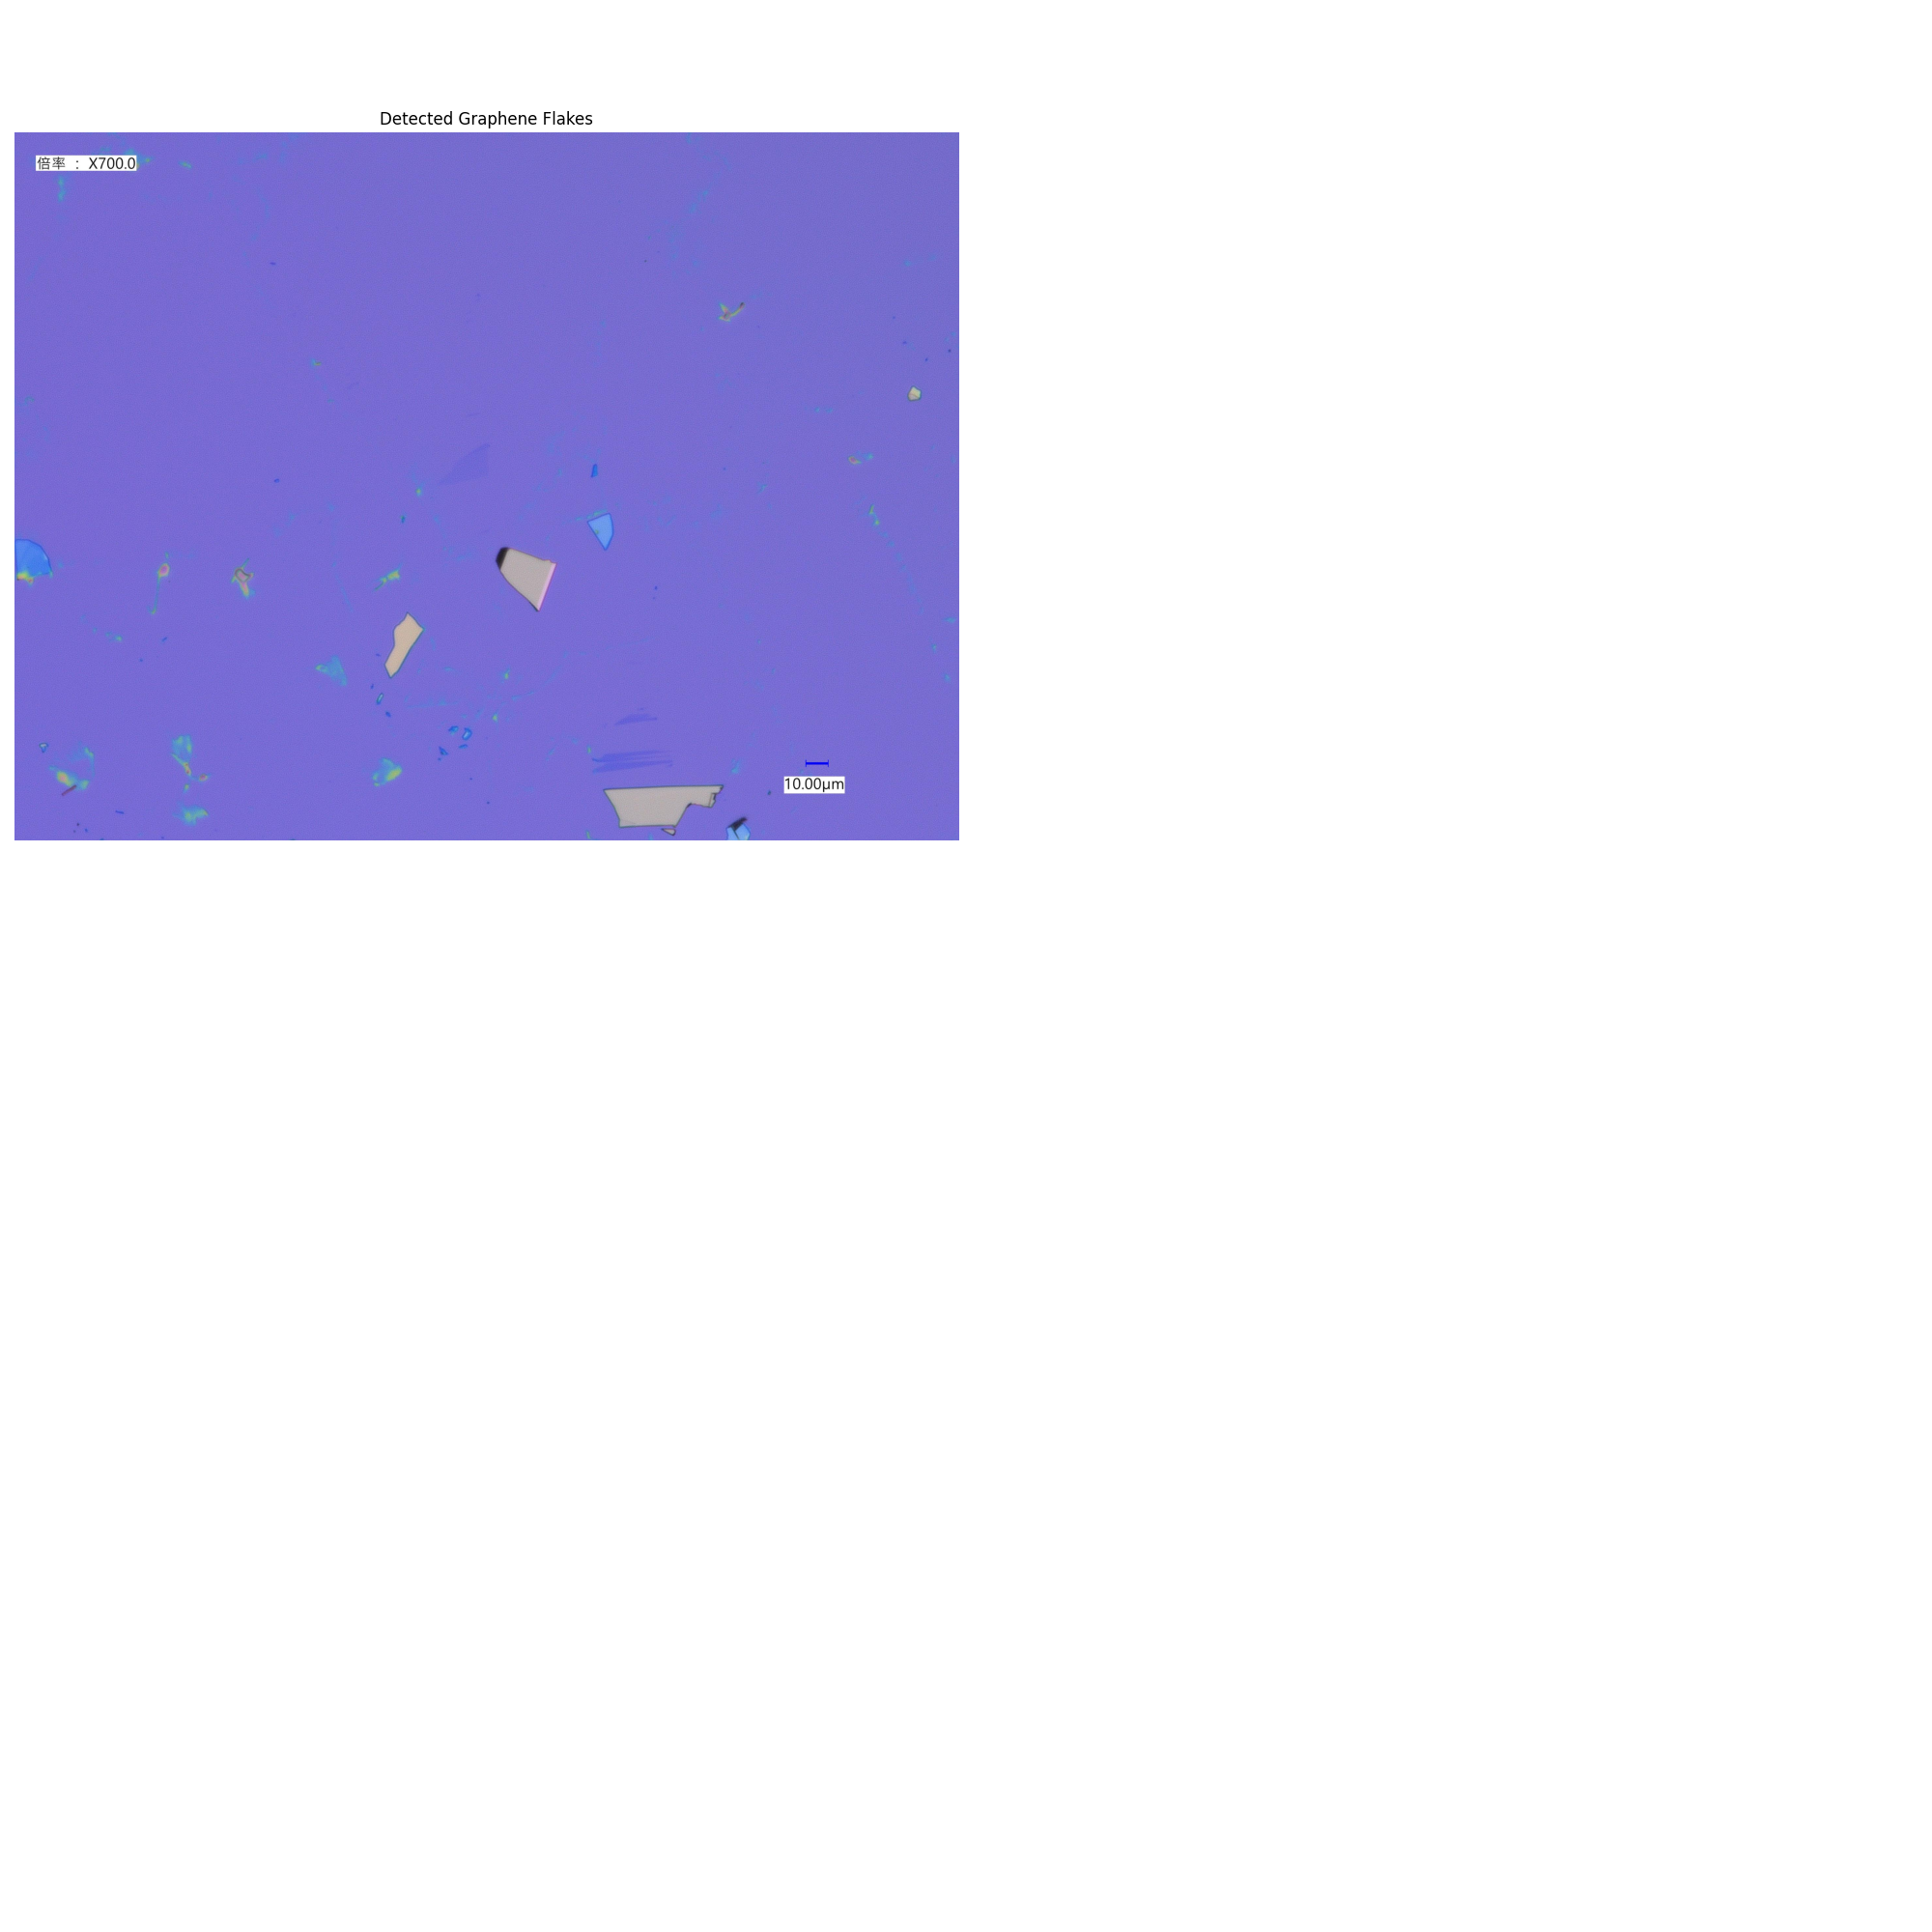

位置 (1809, 1222) 周圍區域的HSV統計：
H: 平均 = 109.67, 標準差 = 1.21
S: 平均 = 146.49, 標準差 = 12.77
V: 平均 = 234.27, 標準差 = 9.07
H範圍: [107.26, 112.09]
S範圍: [120.95, 172.03]
V範圍: [216.13, 252.41]
--------------------
更新後的閾值範圍：
Lower bound: [107.25673724 120.94780471 216.13439792]
Upper bound: [112.08769564 172.03450538 252.40878627]
檢測到的石墨烯片數量: 0


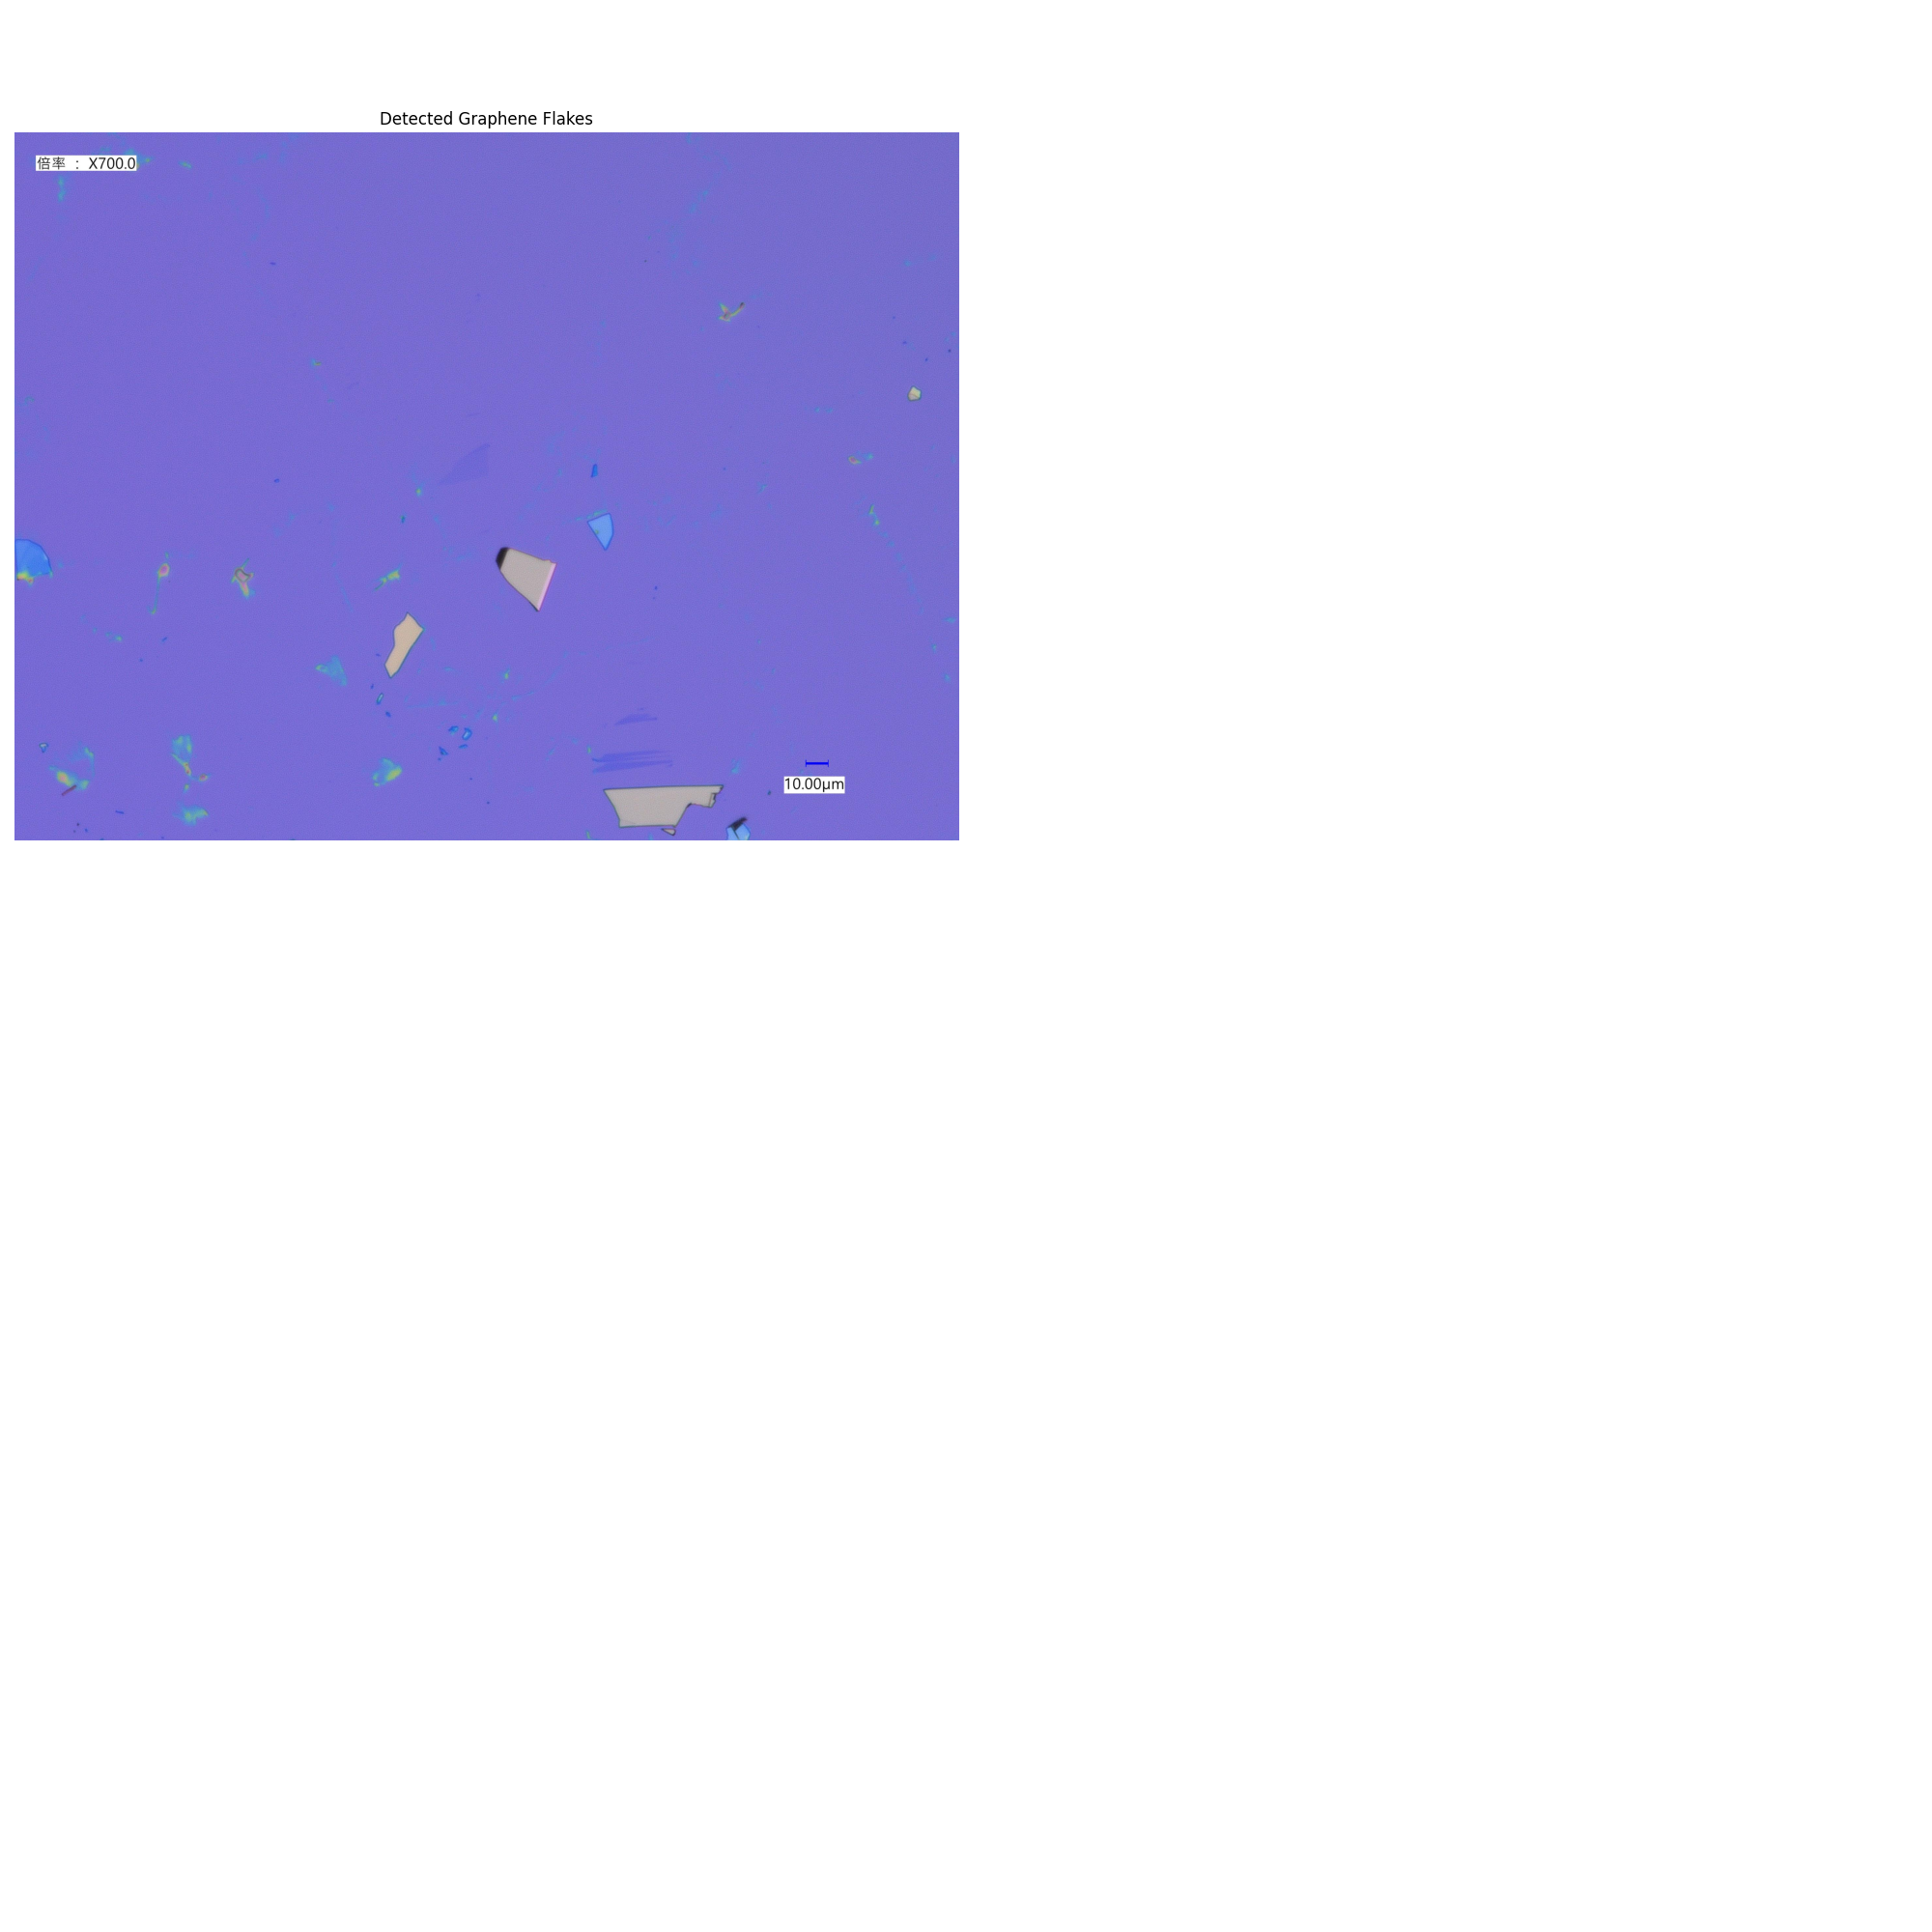

In [9]:
%matplotlib ipympl
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from ipyevents import Event

# Global variables
hsv_image = None
image = None
lower_bound = np.array([126.77, 129.78, 209.47])
upper_bound = np.array([128.62, 141.20, 226.63])

def calculate_hsv_stats(x, y, region_size=31):
    global image, hsv_image
    height, width = image.shape[:2]
    half_size = region_size // 2
    x_start = max(0, x - half_size)
    x_end = min(width, x + half_size + 1)
    y_start = max(0, y - half_size)
    y_end = min(height, y + half_size + 1)
    
    # 提取指定大小的區域
    region = hsv_image[y_start:y_end, x_start:x_end]
    
    # 分離H, S, V通道
    h, s, v = cv2.split(region)
    
    # 計算每個通道的平均值和標準差
    h_mean, h_std = np.mean(h), np.std(h)
    s_mean, s_std = np.mean(s), np.std(s)
    v_mean, v_std = np.mean(v), np.std(v)
    
    print(f"位置 ({x}, {y}) 周圍區域的HSV統計：")
    print(f"H: 平均 = {h_mean:.2f}, 標準差 = {h_std:.2f}")
    print(f"S: 平均 = {s_mean:.2f}, 標準差 = {s_std:.2f}")
    print(f"V: 平均 = {v_mean:.2f}, 標準差 = {v_std:.2f}")
    print(f"H範圍: [{max(0, h_mean - 2*h_std):.2f}, {min(180, h_mean + 2*h_std):.2f}]")
    print(f"S範圍: [{max(0, s_mean - 2*s_std):.2f}, {min(255, s_mean + 2*s_std):.2f}]")
    print(f"V範圍: [{max(0, v_mean - 2*v_std):.2f}, {min(255, v_mean + 2*v_std):.2f}]")
    print("--------------------")
    
    return h_mean, s_mean, v_mean, h_std, s_std, v_std

def on_click(event):
    if event['type'] == 'click':
        x, y = int(event['dataX']), int(event['dataY'])
        h_mean, s_mean, v_mean, h_std, s_std, v_std = calculate_hsv_stats(x, y)
        update_bounds(h_mean, s_mean, v_mean, h_std, s_std, v_std)
        process_image()

def update_bounds(h_mean, s_mean, v_mean, h_std, s_std, v_std, std_multiplier=2):
    global lower_bound, upper_bound
    lower_bound = np.array([max(0, h_mean - std_multiplier*h_std), max(0, s_mean - std_multiplier*s_std), max(0, v_mean - std_multiplier*v_std)])
    upper_bound = np.array([min(180, h_mean + std_multiplier*h_std), min(255, s_mean + std_multiplier*s_std), min(255, v_mean + std_multiplier*v_std)])
    print(f"更新後的閾值範圍：")
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")

def process_image(min_area=5000):
    global image, hsv_image
    
    # 創建遮罩
    mask = cv2.inRange(hsv_image, lower_bound, upper_bound)

    # 對遮罩進行形態學操作以去除噪聲
    kernel = np.ones((5,5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # 尋找輪廓
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 在繪製輪廓之前添加面積過濾
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

    # 使用過濾後的輪廓
    result = image.copy()
    cv2.drawContours(result, filtered_contours, -1, (0, 255, 0), 2)

    # 清除之前的輸出
    # clear_output(wait=True)

    # 創建一個新的圖形，包含原圖和所有檢測到的石墨烯片的局部放大圖
    fig = plt.figure(figsize=(20, 20))
    
    # 顯示原圖
    ax1 = fig.add_subplot(2, 2, 1)
    ax1.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    ax1.set_title('Detected Graphene Flakes')
    ax1.axis('off')

    # 打印結果,數量,面積,位置等
    print(f'檢測到的石墨烯片數量: {len(filtered_contours)}')
    
    # 最多顯示3個局部放大圖
    for i, contour in enumerate(filtered_contours[:3]):
        area = cv2.contourArea(contour)
        M = cv2.moments(contour)
        if M['m00'] != 0:
            cx = int(M['m10'] / M['m00'])
            cy = int(M['m01'] / M['m00'])
            print(f'石墨烯片 {i+1}: 面積={area:.2f}, 中心=({cx},{cy})')

            # 獲取邊界矩形
            x, y, w, h = cv2.boundingRect(contour)
            
            # 擴大裁剪區域，確保包含整個輪廓
            padding = 10
            x1, y1 = max(0, x-padding), max(0, y-padding)
            x2, y2 = min(image.shape[1], x+w+padding), min(image.shape[0], y+h+padding)
            
            # 裁剪圖像
            crop = result[y1:y2, x1:x2]
            
            # 顯示裁剪後的圖像
            ax = fig.add_subplot(2, 2, i+2)
            ax.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
            ax.set_title(f'Flake {i+1}: Area={area:.2f}, Center=({cx},{cy})')
            ax.axis('off')

    plt.tight_layout()
    plt.show()

def on_click(event):
    if event['type'] == 'click':
        x, y = int(event['dataX']), int(event['dataY'])
        h_mean, s_mean, v_mean, h_std, s_std, v_std = calculate_hsv_stats(x, y)
        update_bounds(h_mean, s_mean, v_mean, h_std, s_std, v_std)
        process_image()

def load_and_process_image(image_path, region_size=31, std_multiplier=2, min_area=5000):
    global image, hsv_image
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if image is None:
        print(f"錯誤：無法從 {image_path} 載入圖像")
        return
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Convert image to RGB for display
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Create an interactive image widget
    image_widget = widgets.Image(
        value=cv2.imencode('.png', image)[1].tobytes(),
        format='png',
        width=image.shape[1],
        height=image.shape[0]
    )
    
    # Create an Event instance for the image widget
    event = Event(source=image_widget, watched_events=['click'])
    
    # Add click event to the image widget
    event.on_dom_event(on_click)
    
    display(widgets.VBox([widgets.Label("點擊圖像以分析顏色並更新檢測參數"), image_widget]))
    
    # Initial processing
    process_image(min_area)

# Usage
image_path = "gra.jpg"
load_and_process_image(image_path, region_size=21, std_multiplier=2, min_area=100)

In [8]:
hsv_img[55,70:90]

array([[124, 127, 211],
       [124, 125, 214],
       [124, 129, 208],
       [123, 128, 208],
       [123, 122, 217],
       [123, 129, 205],
       [123, 128, 207],
       [123, 121, 219],
       [123, 128, 208],
       [122, 128, 205],
       [122, 122, 218],
       [122, 123, 216],
       [122, 125, 212],
       [122, 128, 208],
       [123, 130, 206],
       [123, 128, 209],
       [123, 125, 215],
       [123, 122, 220],
       [123, 128, 209],
       [123, 127, 211]], dtype=uint8)

In [38]:
# monolayer

brightlower = np.array([121, 124, 204 ])   
brightupper = np.array([123, 136, 222]) 

# bilayer

darklower = np.array([107,121,216]) 
darkupper = np.array([122,172,252]) 

img = cv2.imread(r"Gra.jpg")
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

hsv_avg = np.mean(hsv_img, axis=(0,1))
print(f"{hsv_avg=}")

output1 = cv2.inRange(hsv_img, brightlower, brightupper)
contours1, hierarchy1 = cv2.findContours(output1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # cv2.RETR_EXTERNAL 表示取得範圍的外輪廓座標串列，cv2.CHAIN_APPROX_SIMPLE 為取值的演算法

output2 = cv2.inRange(hsv_img, darklower, darkupper)
contours2, hierarchy2 = cv2.findContours(output2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# for contour in contours1:
#     area = cv2.contourArea(contour)
#     color = (0,0,255)
#     if(area > 3000):
#         # 取得原座標與長寬尺寸
#         x, y, w, h = cv2.boundingRect(contour)                      
#         print("淺色中心 = ({},{})".format((x+0.5*w)*10//71,(2160-y-0.5*h)*10//71))
#         img = cv2.rectangle(img, (x, y), (x + w, y + h), color, 3)  # 繪製四邊形
        
#         # 定義要標記的字串和位置
#         text = ("({},{})".format((x+0.5*w)*10//71,(2160-y-0.5*h)*10//71))
        
#         # 計算文字的大小
#         font = cv2.FONT_HERSHEY_SIMPLEX
#         font_scale = 1
#         thickness = 2
#         (text_width, text_height) = cv2.getTextSize(text, font, font_scale, thickness)
        
#         # 在指定位置繪製文字
#         org = (int(x+0.5*w), int(y+0.5*h))  # 文字的起始位置
#         color = (0, 0, 255)  # 文字的顏色 (BGR)
#         cv2.putText(img, text, org, font, font_scale, color, thickness)
# cv2.imwrite(r"Gra"+"_test.jpg", img)

for contour in contours2:
    area = cv2.contourArea(contour)
    color = (0,255,0)
    if(area > 1000):
        # 取得原座標與長寬尺寸
        x, y, w, h = cv2.boundingRect(contour)                      
        print("深色中心 = ({},{})".format((x+0.5*w)*10//71,(2160-y-0.5*h)*10//71))
        img = cv2.rectangle(img, (x, y), (x + w, y + h), color, 3)  # 繪製四邊形
        
        # 定義要標記的字串和位置
        # text = ("({},{})".format((x+0.5*w)*10//71,(2160-y-0.5*h)*10//71))
        text = ("({}, {}, {})".format(x+w/2, 2160-y-h/2, area))
        
        # 計算文字的大小
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 1
        thickness = 2
        (text_width, text_height) = cv2.getTextSize(text, font, font_scale, thickness)
        
        # 在指定位置繪製文字
        org = (int(x+0*w), int(y-10+0*h))  # 文字的起始位置
        color = (0, 255, 0)  # 文字的顏色 (BGR)
        cv2.putText(img, text, org, font, font_scale, color, thickness)
         
cv2.imwrite(r"Gra"+"_test.jpg", img)

hsv_avg=array([122.72794512, 122.93071357, 209.90164255])
深色中心 = (261.0,34.0)
深色中心 = (7.0,123.0)
深色中心 = (252.0,132.0)


True

In [10]:
column = int(input("請輸入總共一列有幾張照片"))
pixel = int(input("請輸入10um對應多少pixel"))

請輸入總共一列有幾張照片 26
請輸入10um對應多少pixel 65


In [11]:
count = 0
a = 0  #x座標
b = 2160*25  #y座標

brightlower = np.array([122,127,210])   
brightupper = np.array([122,138,218]) 

darklower = np.array([118,135,212]) 
darkupper = np.array([122,150,225])  

files1 = os.listdir(image_dir)

for file1 in files1:
    file_path = os.path.join(image_dir, os.fspath(file1))
    img = cv2.imread(file_path)
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    output1 = cv2.inRange(hsv_img, brightlower, brightupper)
    contours1, hierarchy1 = cv2.findContours(output1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    output2 = cv2.inRange(hsv_img, darklower, darkupper)
    contours2, hierarchy2 = cv2.findContours(output2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours1:
        area = cv2.contourArea(contour)
        color = (0,0,255)
        
        if(area > 3000): 
            # 取得原座標與長寬尺寸
            x, y, w, h = cv2.boundingRect(contour)
                                
            print("{}淺色中心 = ({},{})".format(count,(x+a+0.5*w)*10//pixel,(2160-y+b-0.5*h)*10//pixel))
            img = cv2.rectangle(img, (x, y), (x + w, y + h), color, 3)
            
             # 定義要標記的字串
            text = ("({},{})".format((x+a+0.5*w)*10//pixel,(2160-y+b-0.5*h)*10//pixel))
            
            # 計算文字的大小  
            font = cv2.FONT_HERSHEY_SIMPLEX
            font_scale = 1
            thickness = 2
            (text_width, text_height) = cv2.getTextSize(text, font, font_scale, thickness)
            
            # 在指定位置繪製文字
            org = (int(x+0.5*w), int(y+0.5*h))  # 文字的起始位置
            color = (0, 0, 255)  # 文字的顏色 (BGR)
            cv2.putText(img, text, org, font, font_scale, color, thickness)

            # 構建輸出檔案名稱
            if (count+1)%column != 0:
                output_filename = f'processed_{count:03d}_{(count//column)+1:03d}_{(count+1)%column:03d}.jpg'
                output_path = os.path.join(output_dir, output_filename)
                cv2.imwrite(output_path, img)
    
            else:
                output_filename = f'processed_{count:03d}_{(count//column)+1:03d}_{column:03d}.jpg'
                output_path = os.path.join(output_dir, output_filename)
                cv2.imwrite(output_path, img)
            
    for contour in contours2:
        area = cv2.contourArea(contour)
        color = (0,255,0)
        if(area > 700):
            # 取得原座標與長寬尺寸
            x, y, w, h = cv2.boundingRect(contour)                      
            print("{}深色中心 = ({},{})".format(count,(x+a+0.5*w)*10//pixel,(2160-y+b-0.5*h)*10//pixel))
            img = cv2.rectangle(img, (x, y), (x + w, y + h), color, 3)  # 繪製四邊形
            
            # 定義要標記的字串
            text = ("({},{})".format((x+a+0.5*w)*10//pixel,(2160-y+b-0.5*h)*10//pixel))
            
            # 計算文字的大小
            font = cv2.FONT_HERSHEY_SIMPLEX
            font_scale = 1
            thickness = 2
            (text_width, text_height) = cv2.getTextSize(text, font, font_scale, thickness)
            
            # 在指定位置繪製文字
            org = (int(x+0.5*w), int(y+0.5*h))  # 文字的起始位置
            color = (0, 255, 0)  # 文字的顏色 (BGR)
            cv2.putText(img, text, org, font, font_scale, color, thickness)
            
            # 構建輸出檔案名稱
            if (count+1)%column != 0:
                output_filename = f'processed_{count:03d}_{(count//column)+1:03d}_{(count+1)%column:03d}.jpg'
                output_path = os.path.join(output_dir, output_filename)
                cv2.imwrite(output_path, img)
    
            else:
                output_filename = f'processed_{count:03d}_{(count//column)+1:03d}_{column:03d}.jpg'
                output_path = os.path.join(output_dir, output_filename)
                cv2.imwrite(output_path, img)
    if ((count//column)+1)%2 != 0 and (count+1)%column != 0: #奇數行
        count += 1
        a += 2880
    elif ((count//column)+1)%2 != 0 and ((count+1)%column) == 0: #奇數行最後一個數字
        count += 1
        b -= 2160
    elif ((count//column)+1)%2 == 0 and (count+1)%(2*column) != 0: #偶數行
        count += 1 
        a -= 2880 
    elif ((count//column)+1)%2 == 0 and (count+1)%(2*column) == 0: #偶數行最後一個數字
        count += 1
        b -= 2160

5深色中心 = (2337.0,8397.0)
5深色中心 = (2375.0,8564.0)
33深色中心 = (8079.0,8001.0)
43深色中心 = (3856.0,8147.0)
53深色中心 = (797.0,7807.0)
57淺色中心 = (2456.0,7908.0)
57深色中心 = (2532.0,7767.0)
57深色中心 = (2533.0,7787.0)
70深色中心 = (8079.0,7970.0)
142深色中心 = (6048.0,6731.0)
156深色中心 = (346.0,6358.0)
156深色中心 = (349.0,6364.0)
156深色中心 = (340.0,6381.0)
166深色中心 = (4447.0,6519.0)
185深色中心 = (9971.0,6144.0)
186深色中心 = (9325.0,6174.0)
187深色中心 = (8951.0,6166.0)
187深色中心 = (8943.0,6176.0)
187深色中心 = (9278.0,6176.0)
206深色中心 = (568.0,6268.0)
213深色中心 = (2391.0,5748.0)
289深色中心 = (10033.0,4749.0)
290深色中心 = (9528.0,4829.0)
291深色中心 = (9097.0,4911.0)
299深色中心 = (5435.0,4759.0)
299深色中心 = (5456.0,4802.0)
309深色中心 = (1166.0,4793.0)
315深色中心 = (1448.0,4495.0)
354深色中心 = (4036.0,4063.0)
355深色中心 = (3979.0,4063.0)
365深色中心 = (539.0,3771.0)
369深色中心 = (2557.0,3938.0)
421深色中心 = (2551.0,3134.0)
425深色中心 = (4025.0,3053.0)
449深色中心 = (8193.0,2676.0)
449深色中心 = (8173.0,2683.0)
449深色中心 = (8298.0,2708.0)
459深色中心 = (3928.0,2844.0)
464深色中心 = (1534.0,2942.0)
46